In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<H1>Polynomial fit</H1>

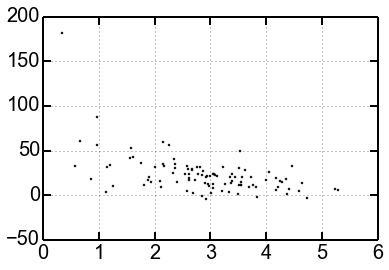

In [2]:
# generate some data
np.random.seed(2)
xdata = np.random.normal(3.0, 1.0, 100)
ydata = np.random.normal(50.0, 30.0, 100) / xdata


plt.plot(xdata, ydata, 'ko',ms=2);

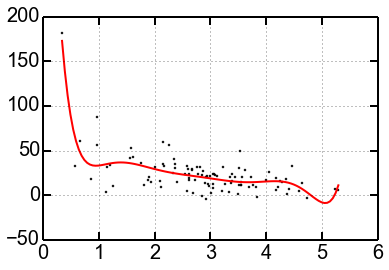

In [3]:
# lets fit to a polynomial function of degree 8
# and plot all together
f = np.poly1d( np.polyfit(xdata, ydata, 8) )
x = np.linspace(np.min(xdata), np.max(xdata), 100)
plt.plot(xdata, ydata, 'ko', ms=2)
plt.plot(x,f(x), 'red');

In [4]:
# compute r**2
from sklearn.metrics import r2_score
r2_score(ydata, f(xdata))

0.62830691926415927

The r2_score is not very good and the large degree of the polynomial suggest an overfitting. The r2_score alone
cannot not say which fitting is the best.

In [5]:
# find the best polynomial
mypoly = dict()
for n in range(1, 10):
    f = np.poly1d( np.polyfit(xdata, ydata, n) )
    mypoly[n] = r2_score(ydata, f(xdata))
    print 'Pol. deg %d -> %f' %(n, mypoly[n])

Pol. deg 1 -> 0.278738
Pol. deg 2 -> 0.360594
Pol. deg 3 -> 0.422788
Pol. deg 4 -> 0.480043
Pol. deg 5 -> 0.553222
Pol. deg 6 -> 0.605666
Pol. deg 7 -> 0.615384
Pol. deg 8 -> 0.628307
Pol. deg 9 -> 0.643824


<H2>Trial and test method</H2>
To avoid overfitting, we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it.

(80, 20)


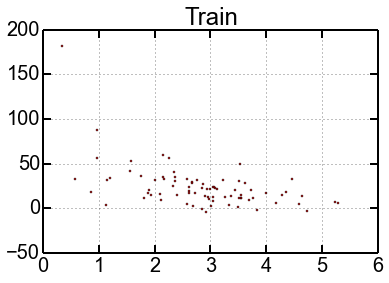

In [6]:
#we'll select 80% of the data to train
xtrain = xdata[:80]
ytrain = ydata[:80]

xtest = xdata[80:]
ytest = ydata[80:]
print(len(xtrain),len(xtest))
plt.plot(xtrain, ytrain, 'ro', ms=2)
plt.title('Train');

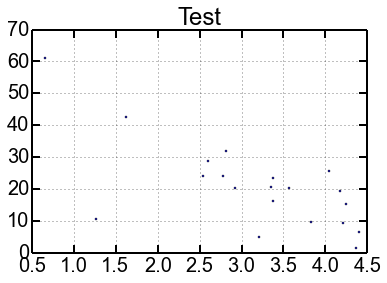

In [7]:
plt.plot(xtest, ytest, 'bo', ms=2)
plt.title('Test');

In [8]:
f = np.poly1d(np.polyfit(xtrain, ytrain, 8))

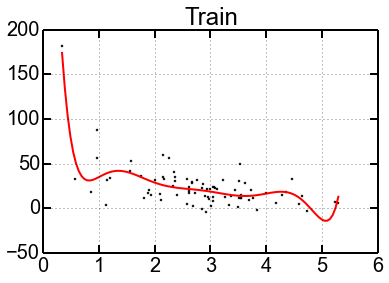

In [9]:
plt.plot(xtrain, ytrain, 'ko', ms=2)
plt.plot(x, f(x),'r')
plt.title('Train');

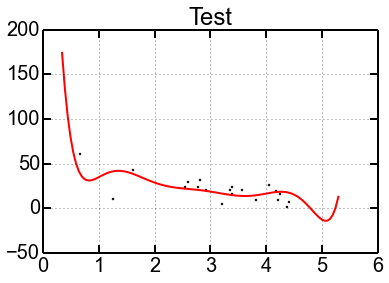

In [10]:
plt.plot(xtest, ytest, 'ko', ms=2)
plt.plot(x, f(x),'r')
plt.title('Test');

In [11]:
r2_score(ytrain, f(xtrain)), r2_score(ytest, f(xtest))

(0.64270695146918921, 0.3001816861070421)

the r2_score value of the test value is telling us that this fit is not very good

In [12]:
# let's compute train and test for all polynomial
# find the best polynomial
r2_test, r2_train = list(), list()
polydeg = range(1,15)
for n in polydeg:
    f = np.poly1d( np.polyfit(xtrain, ytrain, n) )
    r2train = r2_score(ytrain, f(xtrain))
    r2_train.append(r2train)
    r2test =  r2_score(ytest, f(xtest))
    r2_test.append(r2test)
    print 'Pol. deg %d -> r2(train) = %2.4f, r2(test) = %2.4f' %(n,r2train, r2test)
    



Pol. deg 1 -> r2(train) = 0.2647, r2(test) = 0.4225
Pol. deg 2 -> r2(train) = 0.3616, r2(test) = 0.2935
Pol. deg 3 -> r2(train) = 0.4296, r2(test) = 0.2727
Pol. deg 4 -> r2(train) = 0.4831, r2(test) = 0.3936
Pol. deg 5 -> r2(train) = 0.5545, r2(test) = 0.5041
Pol. deg 6 -> r2(train) = 0.6025, r2(test) = 0.6050
Pol. deg 7 -> r2(train) = 0.6170, r2(test) = 0.5461
Pol. deg 8 -> r2(train) = 0.6427, r2(test) = 0.3002
Pol. deg 9 -> r2(train) = 0.6634, r2(test) = 0.2162
Pol. deg 10 -> r2(train) = 0.6819, r2(test) = 0.2249
Pol. deg 11 -> r2(train) = 0.6875, r2(test) = 0.2682
Pol. deg 12 -> r2(train) = 0.6919, r2(test) = 0.0595
Pol. deg 13 -> r2(train) = 0.7050, r2(test) = 0.2260
Pol. deg 14 -> r2(train) = 0.7073, r2(test) = 0.2938


Looking at the r2_scores of the test value, we can resolve that a fitting with  a polynomial degree of six is the best

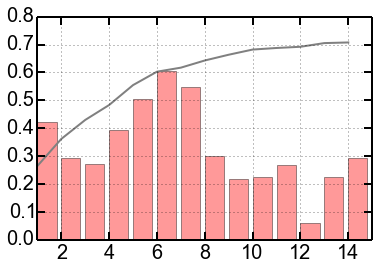

In [13]:
plt.plot(polydeg, r2_train, color='gray')
plt.bar(polydeg, r2_test, color='red', alpha=.4)
plt.xlim(1, 15);

In [14]:
# the best is to fit with a polynomial of degree 6
f = np.poly1d(np.polyfit(xdata,ydata,6))

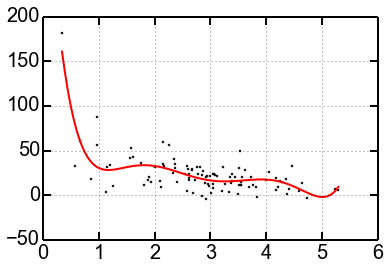

In [15]:
plt.plot(xdata,ydata, 'ko', ms=2)
plt.plot(x,f(x),'red');